In [3]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [4]:
import keras

In [6]:
from keras.datasets import mnist

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [10]:
print("x-train-data shape:",x_train.shape)
print("y-train-data shape:",y_train.shape)
print("x-test-data shape:",x_test.shape)
print("y_test-data shape:",y_test.shape)

x-train-data shape: (60000, 28, 28)
y-train-data shape: (60000,)
x-test-data shape: (10000, 28, 28)
y_test-data shape: (10000,)


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

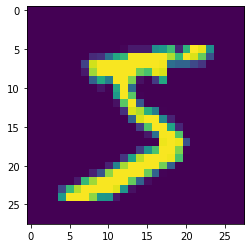

In [17]:
plt.imshow(x_train[0])
#plt.imshow(x_train[0],cmap=plt.cm.binary)

In [14]:
y_train[0]

5

In [15]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

**Normalize/scale the Data**

In [18]:
x_train = keras.utils.normalize(x_train,axis=1)
x_test = keras.utils.normalize(x_test,axis=1)

In [20]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [21]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten


In [29]:
model = Sequential()

#model.add(Dense(256, activation='relu',input_dim=x_train[0].shape))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 

In [32]:
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4964 - accuracy: 0.8598
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1210 - accuracy: 0.9635
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0762 - accuracy: 0.9762


In [33]:
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print(val_loss, val_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0911 - accuracy: 0.9722
0.09107140451669693 0.9721999764442444


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
model.save('/content/drive/My Drive/Artificial_neural_network/mnist.model')

INFO:tensorflow:Assets written to: /content/drive/My Drive/Artificial_neural_network/mnist.model/assets


In [38]:
new_model = keras.models.load_model('/content/drive/My Drive/Artificial_neural_network/mnist.model')

In [39]:
val_loss, val_accuracy = new_model.evaluate(x_test,y_test)
print(val_accuracy,val_loss)

313/313 [==============================] - 1s 1ms/step - loss: 0.0911 - accuracy: 0.9722
0.9721999764442444 0.09107140451669693
